---

#  Experimenting with Zorder and overlapping Axes

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import matplotlib.pyplot as plt

In [3]:
x1 = [0,1,2,3,4]
yR = [2,4,3,5,3.5]
yY = [4850,4400,4800,4800,5000]

x2 = [0,1,1.7,2.4,4]
yG = [4500,4500,4500,4950,4950]

yW = [4700,4720,4730,4740,4750]

axpos = [0.1,0.1,0.8,0.8]

Red    zorder= 0  visible= True  facecolor= (0.0, 0.0, 0.0, 1)
Yellow zorder= 0  visible= True  facecolor= (1.0, 1.0, 1.0, 0.05)
Green  zorder= 0  visible= False  facecolor= (1.0, 1.0, 1.0, 1.0)
White  zorder= 0  visible= False  facecolor= (1.0, 1.0, 1.0, 1.0)


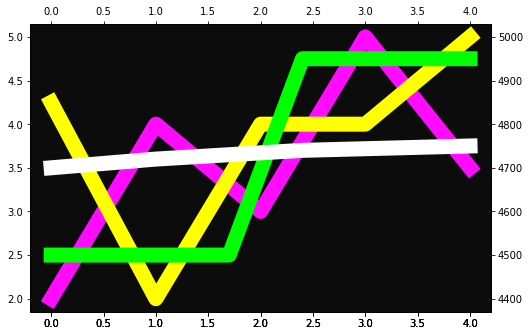

In [4]:
fig = plt.figure(figsize=(8,5))

##fig.patch.set_alpha(0.0)
axR = fig.add_axes( axpos )
axR.set_facecolor('k')

axY = fig.add_axes( axpos, sharex=axR )
axY.yaxis.tick_right()
axY.yaxis.set_label_position("right")
#axY.patch.set_visible(False)
axY.patch.set_alpha(0.05)

axG = axY.twiny()
axW = axG.twiny()

#ax1.patch.set_visible(False)
#ax2.patch.set_visible(False)

#axR.set_facecolor('k')
axR.patch.set_facecolor('k')
#axY.patch.set_facecolor('k')
#axG.patch.set_facecolor('k')
#axW.patch.set_facecolor('k')

#axY.patch.set_visible(True)
#axG.patch.set_visible(True)
#axW.patch.set_visible(True)

_ = axR.plot(x1, yR, linewidth=15, color='magenta')
_ = axY.plot(x1, yY, linewidth=15, color='yellow')
_ = axG.plot(x2, yG, linewidth=15, color='lime')
_ = axW.plot(x2, yW, linewidth=15, color='white')

def print_zorders():
    print('Red    zorder=',axR.get_zorder(),' visible=',axR.patch.get_visible(),' facecolor=',axR.patch.get_facecolor())
    print('Yellow zorder=',axY.get_zorder(),' visible=',axY.patch.get_visible(),' facecolor=',axY.patch.get_facecolor())
    print('Green  zorder=',axG.get_zorder(),' visible=',axG.patch.get_visible(),' facecolor=',axG.patch.get_facecolor())
    print('White  zorder=',axW.get_zorder(),' visible=',axW.patch.get_visible(),' facecolor=',axW.patch.get_facecolor())
    
print_zorders()

In [5]:
stop here

SyntaxError: invalid syntax (<ipython-input-5-a96ba3aab008>, line 1)

In [ ]:
# axes = [axR,axY,axG,axW]
# for ax in axes:
#     ax.patch.set_facecolor('lime')
#     print(ax.get_facecolor(),ax.patch.get_facecolor())

- **Apparently `ax.facecolor` and `ax.patch.facecolor` ARE ONE AND THE SAME, but**
- **`ax.alpha` and `ax.patch.alpha` ARE DIFFERENT, and**
- **`ax.visible` does _NOT_ exist but `ax.patch.visible` _DOES_ exist.**

In [ ]:
# axes = [axR,axY,axG,axW]
# for ax in axes:
#     ax.patch.set_alpha(0.1)
#     print(ax.get_alpha(),ax.patch.get_alpha())

In [ ]:
axR.set_zorder(0.32)
axY.set_zorder(0.31)
axG.set_zorder(0.32)
axW.set_zorder(0.30)
print_zorders()
fig

In [ ]:
axR.set_zorder(0.32)
axY.set_zorder(0.31)
axG.set_zorder(0.32)
axW.set_zorder(0.30)
axG.patch.set_visible(False)
axR.patch.set_visible(False)
print_zorders()
fig

In [ ]:
STOP HERE

In [ ]:
axR.set_zorder(0.3)
axY.set_zorder(0.4)
axG.set_zorder(0.5)
axW.set_zorder(0.29)
#axY.patch.set_visible(True)
#axG.patch.set_visible(True)
#axR.patch.set_visible(False)
print_zorders()
fig

In [ ]:
axR.set_zorder(0.1)
axY.set_zorder(0.2)
axG.set_zorder(0.3)
axW.set_zorder(0.05)
axR.patch.set_visible(True)
print_zorders()
fig

## Apparent Rules for Overlapping Axes:

1. Items drawn first appear *underneath* items drawn later.
2. There is a zorder for each plot element, and a separate zorder for each Axes.
3. Each Axes is drawn completely, with its plotted data, before moving on to draw the next Axes.  In other words, drawing is done per Axes at a time. If you have overlapping Axes, all elements of the second Axes are drawn on top of the first Axes, irrespective of the elements relative zorder.
4. Axes are drawn according to the zorder *of the Axes*.
5. If two or more Axes have the same zorder value, then Axes are drawn in the order they were created (i.e. the order that they appear in the `list` `Figure.axes`).

#### Still trying to verify the following:
6. The first Axes created within a given Figure, us unique in that *it will obscure the data from other axes* if it is drawn after them.  
7. This problem can be solved if the other Axes have `patch.set_visible(False)` ???


In [ ]:
axatt = dir(axR)

In [ ]:
axlist = fig.axes

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
# dirlist = dir(axlist[0])
# #dirlist
# for item in dirlist[0:]:
#     obj0 = 'axlist[0].'+item
#     obj1 = 'axlist[1].'+item
#     #print(item+':\n','   ',obj0==obj1,'\n   ',eval(obj0),'\n   ',eval(obj1))
#     print(item+':')
# #    pp.pprint(eval(obj0))